In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read dataframe from csv and trim the data
df = pd.read_csv("results.csv")

In [10]:
# Make column for 2 * cleanliness + efficiency
df['new']=df['cleaned']*2+df['efficiency']

In [11]:
# Make column for cleanliness * efficiency
df['new2']=df['cleaned']*df['efficiency']/100

In [12]:
df.sort_values(by=['cleaned', 'efficiency'])

,Unnamed: 0,gamma,epsilon,alpha,episodes,steps,cleaned,efficiency,new,new2
518,518,0.9,0.05,0.6,50.0,150.0,10.784314,32.594937,54.163564,3.515140
249,249,0.7,0.05,0.3,50.0,300.0,10.784314,33.993399,55.562027,3.665955
540,540,0.9,0.05,0.9,50.0,50.0,10.784314,34.680135,56.248762,3.740015
513,513,0.9,0.05,0.6,50.0,50.0,10.784314,35.763889,57.332516,3.856890
273,273,0.7,0.05,0.6,50.0,150.0,10.784314,35.888502,57.457129,3.870329
...,...,...,...,...,...,...,...,...,...,...
214,214,0.5,0.20,0.6,300.0,300.0,100.000000,74.100719,274.100719,74.100719
236,236,0.5,0.20,0.9,300.0,50.0,100.000000,74.637681,274.637681,74.637681
239,239,0.5,0.20,0.9,300.0,150.0,100.000000,74.637681,274.637681,74.637681
479,479,0.7,0.20,0.9,300.0,50.0,100.000000,77.443609,277.443609,77.443609


last row was the best performing trial.

In [13]:
grp = df.groupby(['gamma','epsilon','alpha','episodes','steps'])
x =grp.mean().sort_values(by=['cleaned', 'efficiency'])
x = x.reset_index()
x

,gamma,epsilon,alpha,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
0,0.7,0.05,0.3,50.0,300.0,250.0,12.091503,34.813081,58.996088,4.224997
1,0.9,0.05,0.3,50.0,50.0,487.0,12.418301,34.128787,58.965388,4.235645
2,0.7,0.05,0.9,50.0,50.0,298.0,12.418301,34.908345,59.744946,4.326865
3,0.5,0.05,0.6,50.0,50.0,28.0,12.418301,35.738621,60.575222,4.441969
4,0.7,0.05,0.6,50.0,150.0,274.0,12.418301,35.846964,60.683565,4.450226
...,...,...,...,...,...,...,...,...,...,...
238,0.7,0.20,0.9,150.0,300.0,475.0,83.006536,47.554320,213.567391,39.715373
239,0.7,0.20,0.9,300.0,150.0,481.0,87.581699,48.865354,224.028752,43.010167
240,0.5,0.20,0.6,150.0,300.0,205.0,90.849673,47.442216,229.141562,43.121019
241,0.5,0.20,0.9,300.0,300.0,241.0,91.176471,46.507164,228.860105,42.442640


Last row is the best performing parameter combination (average of 3 trials)

# now testing performance based on steps and episodes.

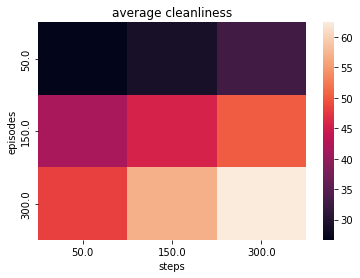

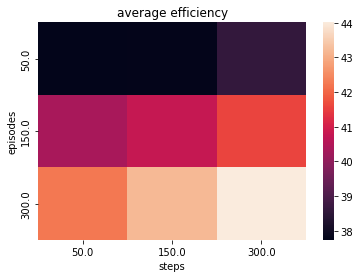

In [59]:
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('q-300x300-clean.png')
plt.show()
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('q-300x300-eff.png')
plt.show()

In [41]:
col1, col2 = "cleaned", "efficiency"
corr = x[col1].corr(x[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  cleaned  and  efficiency is:  0.91


In [30]:
import copy
d = copy.deepcopy(x)
d = d[d['episodes']==300]
d = d[d['steps']==300]
d

,gamma,epsilon,alpha,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
64,0.9,0.05,0.9,300.0,300.0,565.0,24.183007,35.511438,83.877451,8.822584
98,0.9,0.05,0.3,300.0,300.0,511.0,35.294118,38.421113,109.009349,13.819083
120,0.7,0.05,0.3,300.0,300.0,268.0,45.098039,40.925854,131.121932,19.185860
125,0.5,0.05,0.3,300.0,300.0,25.0,46.732026,39.930657,133.394709,18.820670
127,0.9,0.10,0.6,300.0,300.0,619.0,47.712418,40.473171,135.898008,19.684730
128,0.9,0.05,0.6,300.0,300.0,538.0,47.712418,40.540763,135.965600,19.371065
133,0.5,0.05,0.6,300.0,300.0,52.0,48.039216,43.963588,140.042019,22.288050
152,0.7,0.05,0.9,300.0,300.0,322.0,52.941176,40.856619,146.738972,21.832718
155,0.9,0.10,0.9,300.0,300.0,646.0,53.594771,41.840459,149.030001,22.591805
160,0.9,0.20,0.6,300.0,300.0,700.0,56.209150,42.783503,155.201803,24.660261


In [31]:
d = d.drop('episodes', 1)
d = d.drop('steps', 1)
d

C:\Users\t1rk9\AppData\Local\Temp/ipykernel_14420/757441431.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  d = d.drop('episodes', 1)
C:\Users\t1rk9\AppData\Local\Temp/ipykernel_14420/757441431.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  d = d.drop('steps', 1)


,gamma,epsilon,alpha,Unnamed: 0,cleaned,efficiency,new,new2
64,0.9,0.05,0.9,565.0,24.183007,35.511438,83.877451,8.822584
98,0.9,0.05,0.3,511.0,35.294118,38.421113,109.009349,13.819083
120,0.7,0.05,0.3,268.0,45.098039,40.925854,131.121932,19.185860
125,0.5,0.05,0.3,25.0,46.732026,39.930657,133.394709,18.820670
127,0.9,0.10,0.6,619.0,47.712418,40.473171,135.898008,19.684730
128,0.9,0.05,0.6,538.0,47.712418,40.540763,135.965600,19.371065
133,0.5,0.05,0.6,52.0,48.039216,43.963588,140.042019,22.288050
152,0.7,0.05,0.9,322.0,52.941176,40.856619,146.738972,21.832718
155,0.9,0.10,0.9,646.0,53.594771,41.840459,149.030001,22.591805
160,0.9,0.20,0.6,700.0,56.209150,42.783503,155.201803,24.660261


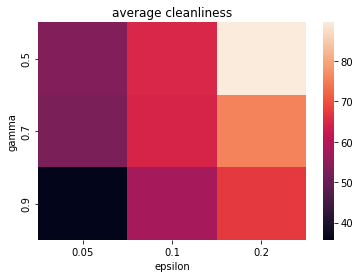

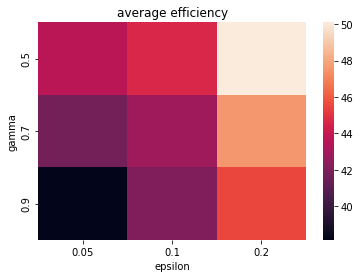

In [60]:
gropued = d.groupby([ 'gamma','epsilon'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('q-gammaxepsilon-clean.png')
plt.show()
gropued = d.groupby([ 'gamma','epsilon'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('q-gammaxepsilon-eff.png')
plt.show()

In [40]:
d1 = copy.deepcopy(d)
d1 = d1[d1['epsilon']==0.2]
d1 = d1[d1['gamma']==0.5]
d1

,gamma,epsilon,alpha,Unnamed: 0,cleaned,efficiency,new,new2
237,0.5,0.2,0.3,187.0,83.006536,48.606375,214.619446,40.592517
241,0.5,0.2,0.9,241.0,91.176471,46.507164,228.860105,42.442640
242,0.5,0.2,0.6,214.0,94.444444,55.169215,244.058104,52.641063
